In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Capstone/ForEx_Dataset.csv")

In [ ]:
df.head(5)

,Date,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,...,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,VEF,BHD
0,29-12-2023,83.186,56.679,62.821,98.871,12.3174,88.962,105.922,10.6569,0.005405,...,0.6117,4.8961,1.5014,0.2990,21.11,0.9321,22.18,2.82,2.32,220.640
1,28-12-2023,83.169,56.796,62.850,98.448,12.3411,89.245,105.874,10.6433,0.005341,...,0.6122,4.8998,1.4945,0.2939,21.20,0.9397,22.18,2.82,2.32,220.578
2,27-12-2023,83.263,56.993,63.025,98.722,12.4011,89.069,106.534,10.6607,0.005414,...,0.6129,4.9187,1.4962,0.2949,21.39,0.9087,22.20,2.83,2.31,220.819
3,26-12-2023,83.158,56.747,63.018,97.398,12.3155,89.258,105.827,10.6495,0.005399,...,0.6094,4.8957,1.4989,0.2945,21.21,0.9074,22.17,2.84,2.31,220.508
4,25-12-2023,83.164,56.518,62.756,97.086,12.2775,89.081,105.527,10.6451,0.005377,...,0.6076,4.8777,1.5009,0.2976,21.06,0.9039,22.17,2.83,2.32,220.588


In [ ]:
df = df[['Date', 'GBP']]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df_month = df.resample('MS').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  216


,GBP
Date,
2006-01-01,77.376955
2006-02-01,77.967700
2006-03-01,82.557435
2006-04-01,85.323600
2006-05-01,84.555913


<Axes: xlabel='Date'>

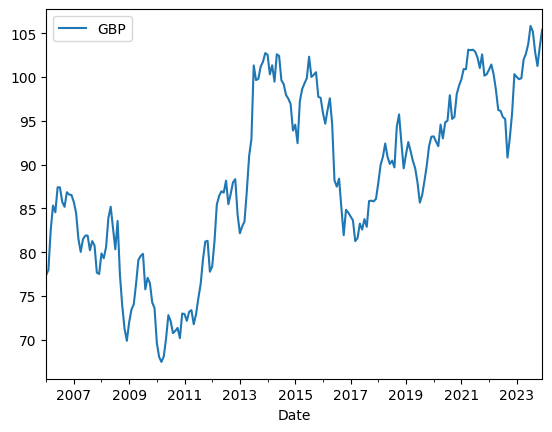

In [ ]:
df_month.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
x=df_month['GBP']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -1.5038480141268067
p-value 0.5316069297411282
critical values 853.2635404146076
Reject the null hypotheise , it mean data is not stationary


In [ ]:
df_month['GBP_1']=df_month['GBP'].diff().dropna()

<Axes: xlabel='Date'>

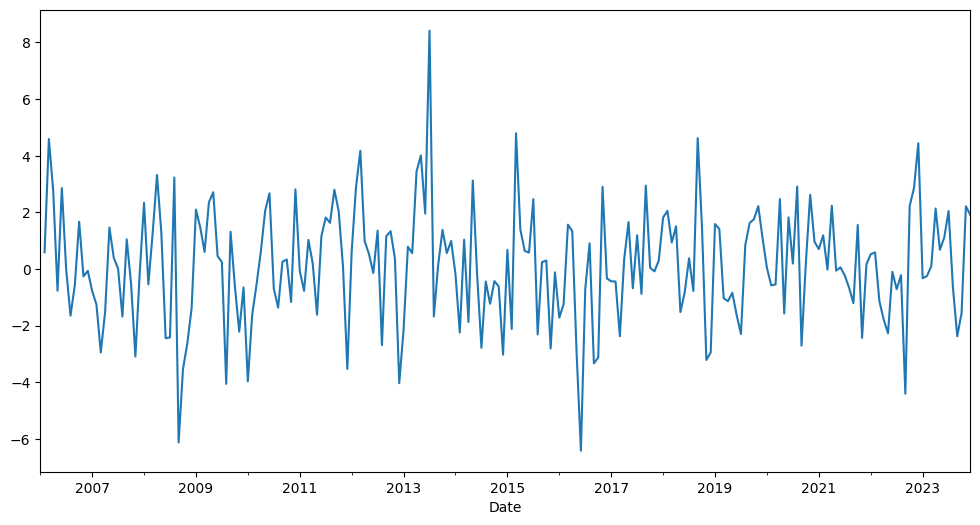

In [ ]:
df_month['GBP_1'].plot()

In [ ]:
x=df_month['GBP_1'].dropna()
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -12.440264602887456
p-value 3.767078401173095e-23
critical values 849.2433657967899
fail to reject null hypothese h1 , it mean data is stationary


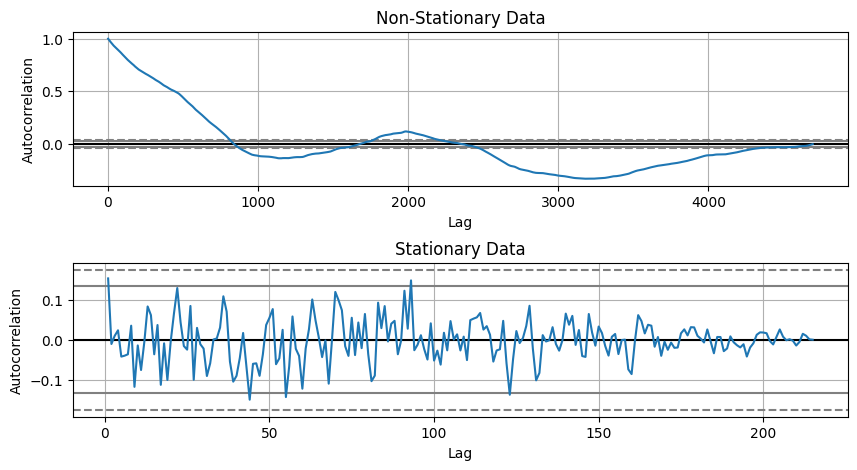

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df, ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(x, ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.4 MB/s eta 0:00:00


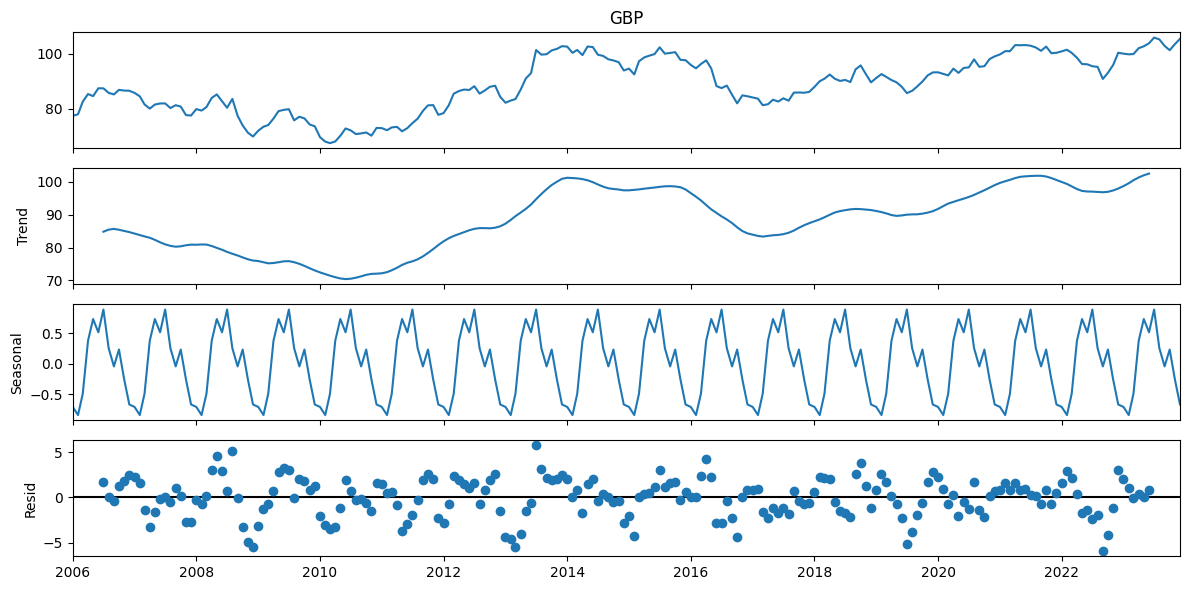

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_month['GBP'] , period = 12, model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

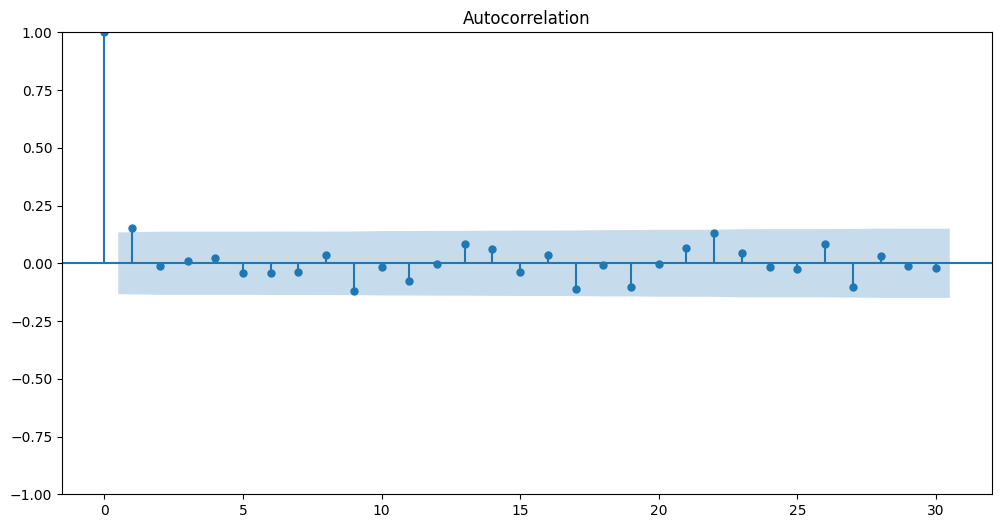

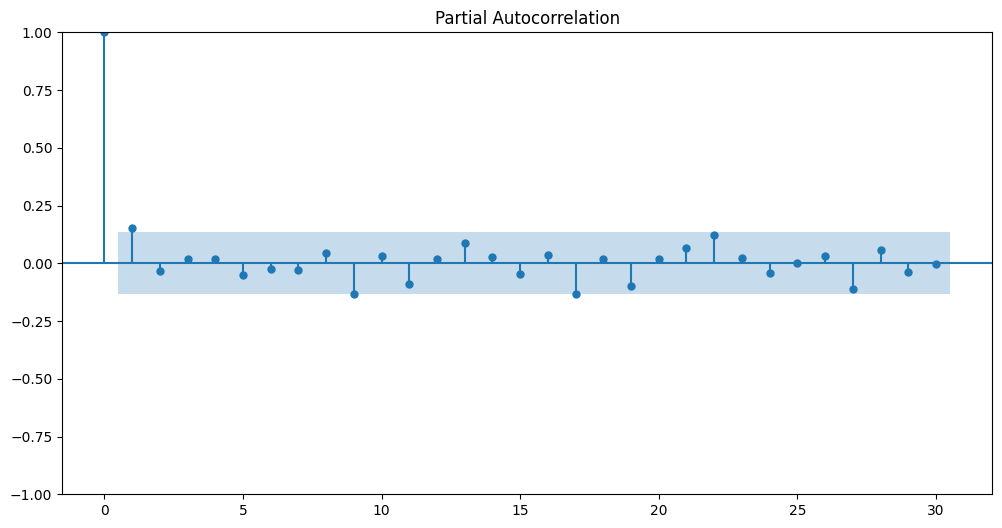

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

plot_acf(df_month['GBP_1'].iloc[1:],lags=30)
plot_pacf(df_month['GBP_1'].iloc[1:],lags=30)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

model = auto_arima(df_month['GBP'], m = 12 , d = 1 ,seasonal = True , max_order=None, test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=919.644, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=918.487, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=918.239, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=918.524, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=916.245, Time=0.20 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=918.239, Time=0.42 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=920.238, Time=0.88 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=918.220, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=918.219, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=916.498, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=920.220, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=914.923, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=916.921, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12]             

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df_month['GBP'], order=(0,1,2),seasonal_order=(3,2,2,12), enforce_stationarity=False,
                                  enforce_invertibility=False)
result = model.fit(disp=False)

<Axes: xlabel='Date'>

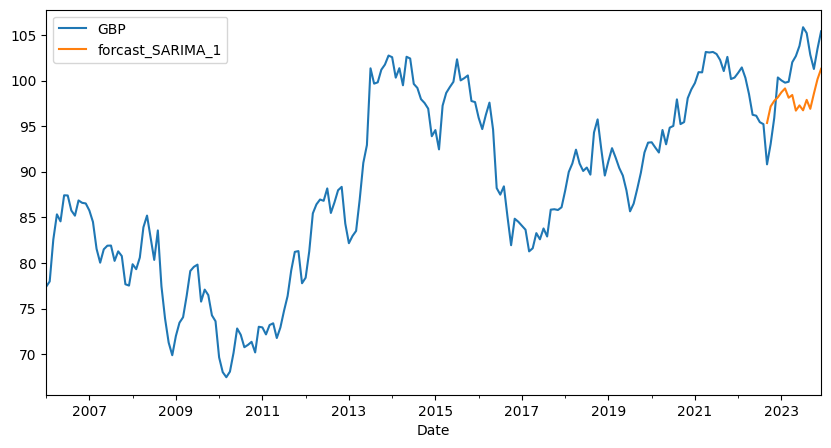

In [ ]:
df_month['forcast_SARIMA_1']=result.predict(start=200, end=216 ,dynamic=True)
df_month[['GBP','forcast_SARIMA_1']].plot(figsize=(10, 5))

In [ ]:
predictions = result.predict(typ = 'levels')

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['GBP'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['GBP'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['GBP'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['GBP'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['GBP'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 36.42 % 

Mean Squared Error :  63.36665741007349 

Mean Absolute Error :  2.8172108374402822 

Root Mean Squared Error :  7.960317670173314 

Mean Absolute Percentage Error : 3.33 %


In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

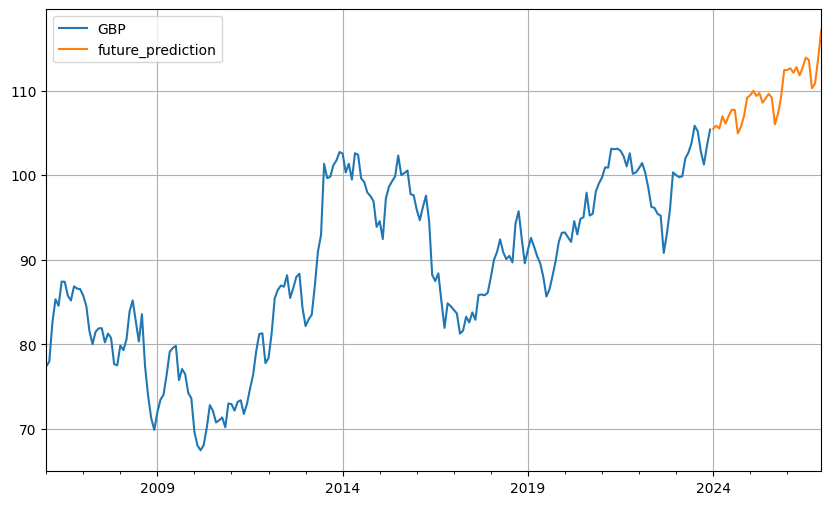

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True, typ='levels')
df_month[['GBP','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']
filtered_df

,GBP,forcast_SARIMA_1,future_prediction
2023-01-01,100.008682,98.715051,NaN
2023-02-01,99.762050,99.131903,NaN
2023-03-01,99.864217,98.113129,NaN
2023-04-01,102.001950,98.411709,NaN
2023-05-01,102.678957,96.699166,NaN
2023-06-01,103.795864,97.270489,NaN
2023-07-01,105.843905,96.731367,NaN
2023-08-01,105.198087,97.877936,NaN
2023-09-01,102.824429,96.895422,NaN
2023-10-01,101.264727,98.558972,NaN


In [ ]:
df_month.to_csv("gdrive/My Drive/Colab Notebooks/Capstone/Sarima_GBP.csv", index=True)

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['GBP'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['GBP'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['GBP'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['GBP'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['GBP'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 5.03 % 

Mean Squared Error :  88.15683774825865 

Mean Absolute Error :  3.257849760500478 

Root Mean Squared Error :  9.38918727836753 

Mean Absolute Percentage Error : 3.85 %


In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

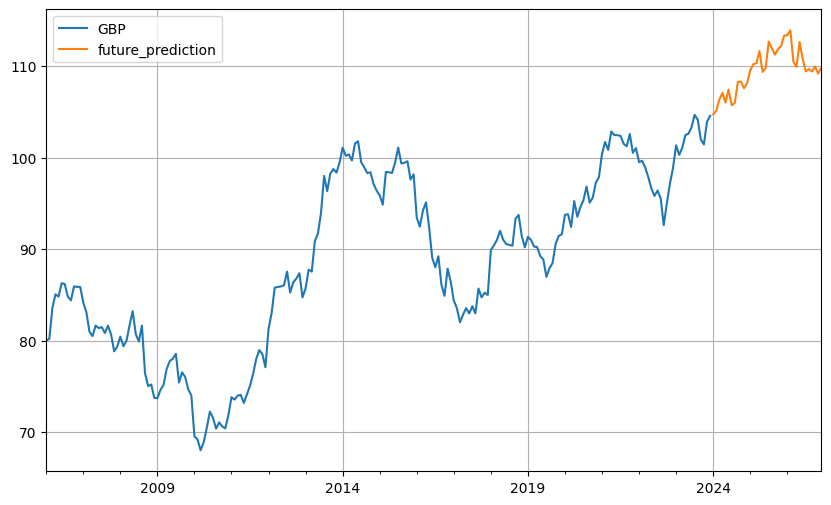

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True, typ='levels')
df_month[['GBP','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']

In [ ]:
filtered_df

,GBP,forcast_SARIMA_1,future_prediction
2023-01-01,101.355095,95.342663,NaN
2023-02-01,100.312750,95.015514,NaN
2023-03-01,101.082875,95.108575,NaN
2023-04-01,102.476100,95.481472,NaN
2023-05-01,102.628952,95.121920,NaN
2023-06-01,103.334708,94.994722,NaN
2023-07-01,104.689682,96.346356,NaN
2023-08-01,104.154455,95.765795,NaN
2023-09-01,102.016810,96.187183,NaN
2023-10-01,101.446045,96.143869,NaN
